In [1]:
import cv2
import numpy as np
from keras.utils import Sequence

from transform.sequences import RandomRotationTransformer

"""First, let's create a simple Sequence that load an image and resize it."""


class SimpleSequence(Sequence):
    def __init__(self, paths, shape=(200, 200)):
        self.paths = paths
        self.shape = shape
        self.batch_size = 1

    def __len__(self):
        return len(self.paths) // self.batch_size

    def __getitem__(self, index):
        paths = self.paths[index * self.batch_size:(index + 1) * self.batch_size]
        X = [cv2.resize(cv2.imread(p), self.shape) for p in paths]
        y = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in X]
        return np.array(X), np.array(y).reshape([self.batch_size, self.shape[0], self.shape[1], 1])

Using TensorFlow backend.


In [2]:
"""Transformers are Sequence that takes a Sequence to modify it."""
from glob import glob
paths = glob('/data/images_folder/*.jpg')
seq = SimpleSequence(paths)
transformer = RandomRotationTransformer(seq,rg=35)
X,y = transformer[0]

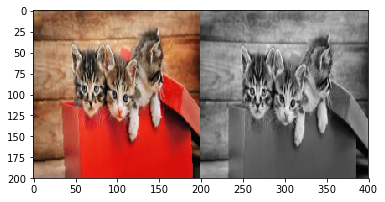

In [3]:
"""Canonical example where X is transformed but not y"""
import matplotlib.pyplot as plt
%matplotlib inline
im = np.concatenate((X[0],cv2.cvtColor(y[0],cv2.COLOR_GRAY2BGR)),1)

plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

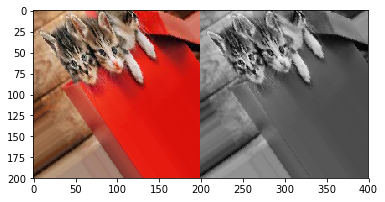

In [6]:
"""Applying the SAME transformation to X and y is done by specifying a mask."""
transformer = RandomRotationTransformer(seq,35,mask=[True,True])
X,y = transformer[0]
im = np.concatenate((X[0],cv2.cvtColor(y[0],cv2.COLOR_GRAY2BGR)),1)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

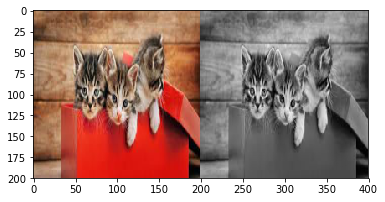

In [7]:
"""You can also disable data augmentation entirely."""
transformer = RandomRotationTransformer(seq,35,mask=False)
X,y = transformer[0]
im = np.concatenate((X[0],cv2.cvtColor(y[0],cv2.COLOR_GRAY2BGR)),1)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))